In [10]:
from netCDF4 import Dataset

mrsofile = '/work/kajiyama/data/cmip6/raw/ICON-ESM-LR/mrso/mrso_Lmon_ICON-ESM-LR_historical_r1i1p1f1_gn_185001-185912.nc'
sncfile = '/work/kajiyama/data/cmip6/raw/ICON-ESM-LR/snc/snc_LImon_ICON-ESM-LR_historical_r1i1p1f1_gn_185001-185912.nc'
tslfile = '/work/kajiyama/data/cmip6/raw/ICON-ESM-LR/tsl/tsl_Lmon_ICON-ESM-LR_historical_r1i1p1f1_gn_185001-185912.nc'
prfile = '/work/kajiyama/data/cmip6/raw/ICON-ESM-LR/pr/pr_Amon_ICON-ESM-LR_historical_r1i1p1f1_gn_185001-185912.nc'
tosfile = '/work/kajiyama/data/cmip6/raw/ICON-ESM-LR/tos/tos_Omon_ICON-ESM-LR_historical_r1i1p1f1_gn_185001-185912.nc'
ds = Dataset(mrsofile, 'r')
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    CDI_grid_type: unstructured
    CDO: Climate Data Operators version 2.0.0rc5 (https://mpimet.mpg.de/cdo)
    Conventions: CF-1.7 CMIP-6.2
    activity_id: CMIP
    branch_method: standard
    branch_time_in_child: 0.0
    branch_time_in_parent: 0.0
    contact: cmip6-mpi-esm@dkrz.de
    creation_date: 2021-10-06T10:41:40Z
    data_specs_version: 01.00.30
    experiment: all-forcing simulation of the recent past
    experiment_id: historical
    external_variables: areacella
    forcing_index: 1
    frequency: mon
    further_info_url: https://furtherinfo.es-doc.org/CMIP6.MPI-M.ICON-ESM-LR.historical.none.r1i1p1f1
    grid: gn
    grid_label: gn
    grid_type: unstructured
    history: 2021-10-06T10:41:40Z ; CMOR rewrote data to be consistent with CMIP6, CF-1.7 CMIP-6.2 and CF standards.
    initialization_index: 1
    institution: Max Planck Institute for Meteorology, Hamburg 20146, German

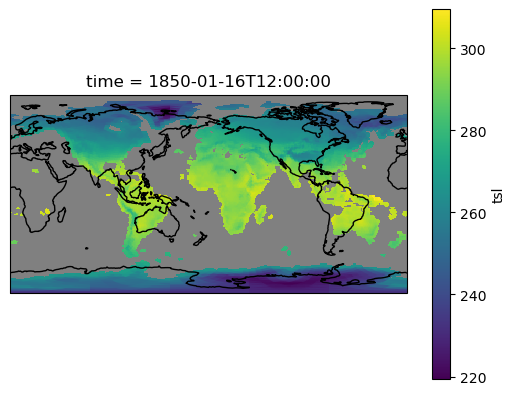

In [18]:
from cdo import Cdo
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray
import numpy as np

infile = tslfile
variable = 'tsl'

cdo = Cdo()
projection = ccrs.PlateCarree(central_longitude=180)
img_extent = (-180, 180, -90, 90)
val = cdo.remapycon('global_1', input=f'-seltimestep,1 '+infile, returnXArray=variable)
if variable == 'tsl':
    data = np.mean(val, axis=1).plot(subplot_kws=dict(projection=projection, facecolor='gray'),
                    transform=projection)
else:   
    data = val.plot(subplot_kws=dict(projection=projection, facecolor='gray'),
                    transform=projection)
data.axes.coastlines()
plt.show() 